# Import all kind of stuff

In [1]:
import numpy as np

from matplotlib.markers import MarkerStyle
from matplotlib.lines import Line2D

import superconductivity.api as sc

from superconductivity.api import G_0_muS
from superconductivity.api import NDArray64

from IPython import get_ipython

_ip = get_ipython()
if _ip is not None:
    _ip.run_line_magic("reload_ext", "autoreload")
    _ip.run_line_magic("autoreload", "2")

    _ip.run_line_magic(
        "config",
        "InlineBackend.print_figure_kwargs = {'bbox_inches': None, 'pad_inches': 0.0}",
    )
    _ip.run_line_magic("config", 'InlineBackend.figure_format = "retina"')  # or "png"
    _ip.run_line_magic(
        "config", "InlineBackend.rc = {'figure.dpi': 300}"
    )  # choose a value you like

INFO:2026-01-28 15:03:56,561:jax._src.xla_bridge:812: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)
Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no suc

# $\Delta(r)$

In [2]:
x = np.linspace(0, 3 * 2 * np.pi, 361)
barrier_width = 0.25 * np.pi
barrier_0 = 4 * np.pi
x_barrier0 = barrier_0 - barrier_width / 2
x_barrier1 = barrier_0 + barrier_width / 2

damping = 10 * np.pi
damping1 = np.where(
    x < x_barrier0,
    1.0,
    np.exp((x_barrier0 - x) / damping),
)
damping2 = np.where(
    x > x_barrier1,
    1.0,
    np.exp((-x_barrier1 + x) / damping),
)

nu = 1
phi = 1 * np.pi
phi_0 = np.pi / 2
phi_off = np.pi / 2

psi1 = np.sin((x / (nu) - (phi_0))) ** 1
psi2 = np.sin((x / (nu) - (phi_0 + phi))) ** 1
psi1 *= damping1
psi2 *= damping2

psi_half = 1.1
psi_min = -1
psi_max = 1

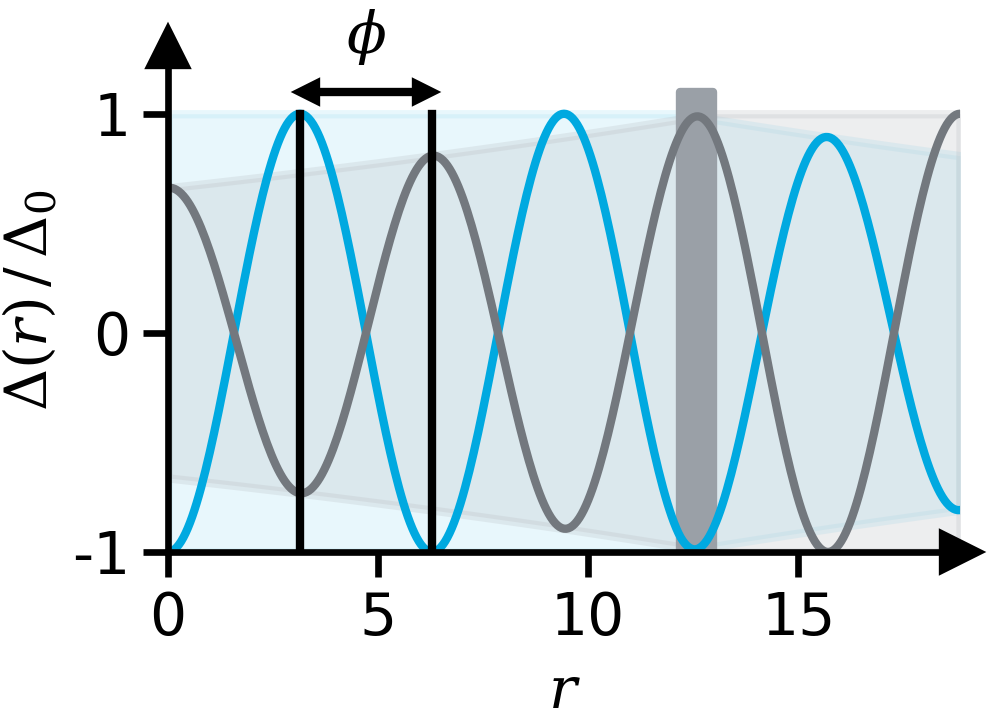

In [3]:
fig, ax = sc.get_figure(figsize=(1.68, 1.2))

# damping
ax.fill_between(
    x, +damping1, -damping1, color=sc.get_color("seeblau", "35", alpha=0.25)
)
ax.fill_between(
    x, +damping2, -damping2, color=sc.get_color("seegrau", "35", alpha=0.25)
)

# barrier
ax.fill_between(
    x=[x_barrier0, x_barrier1],
    y1=[psi_min, psi_min],
    y2=[psi_max * 1.1, psi_max * 1.1],
    color=sc.seegrau65,
    alpha=1,
)

# wave function
ax.plot(x, psi1, color=sc.get_color("seeblau", "100"))
ax.plot(x, psi2, color=sc.get_color("seegrau", "100"))

# ax.plot(x, +damping1, "--", color=get_color("seeblau", "100"))
# ax.plot(x, -damping1, "--", color=get_color("seeblau", "100"))
# ax.plot(x, +damping2, "--", color=get_color("seegrau", "80"))
# ax.plot(x, -damping2, "--", color=get_color("seegrau", "80"))

color = "k"
ax.plot(
    [phi_off + phi_0 + 0.2, phi_off + phi_0 + phi - 0.2],
    [psi_half, psi_half],
    "-",
    color=color,
)
ax.plot([phi_off + phi_0, phi_off + phi_0], [psi_min, psi_max], "-", color=color)
ax.plot(
    [phi_off + phi_0 + phi, phi_off + phi_0 + phi], [psi_min, psi_max], "-", color=color
)
ax.plot(
    [phi_off + phi_0 + phi - 0.2], [psi_half], ">", color=color, clip_on=False, ms=2
)
ax.plot([phi_off + phi_0 + 0.2], [psi_half], "<", color=color, clip_on=False, ms=2)

ax.text(
    phi_off + phi_0 + phi / 2,
    psi_half + 0.25,
    "$\\phi$",
    color="k",
    ha="center",
    va="center",
    fontsize=7,
)

ax.set_ylim(psi_min, psi_max * 1.3)
ax.set_xlim(np.min(x), np.max(x))

# ax.set_xticks([phi_off + phi_0, phi_off + phi_0 + phi], ["$\\phi1$", "$\\phi_2$"])
# ax.set_xticks([phi_off + phi_0 + phi / 2], ["$\\phi$"])
# ax.set_xticks([])
# ax.set_yticks([-1, 0, 1], ["$-|\\Delta|$", "0", "$|\\Delta|$"])
# ax.set_yticks([])

title = "theory/macro/delta-r"
xlabel = "$r$"
ylabel = "$\\Delta(r)\\,/\\,\\Delta_0$"

sc.theory_layout(fig, ax, title, xlabel, ylabel, padding=(0.2, 0.2))

# Josephson $I(\phi)$

In [4]:
phi = np.linspace(0, 2.64 * np.pi, 361)
I_J_phi = np.sin(phi)

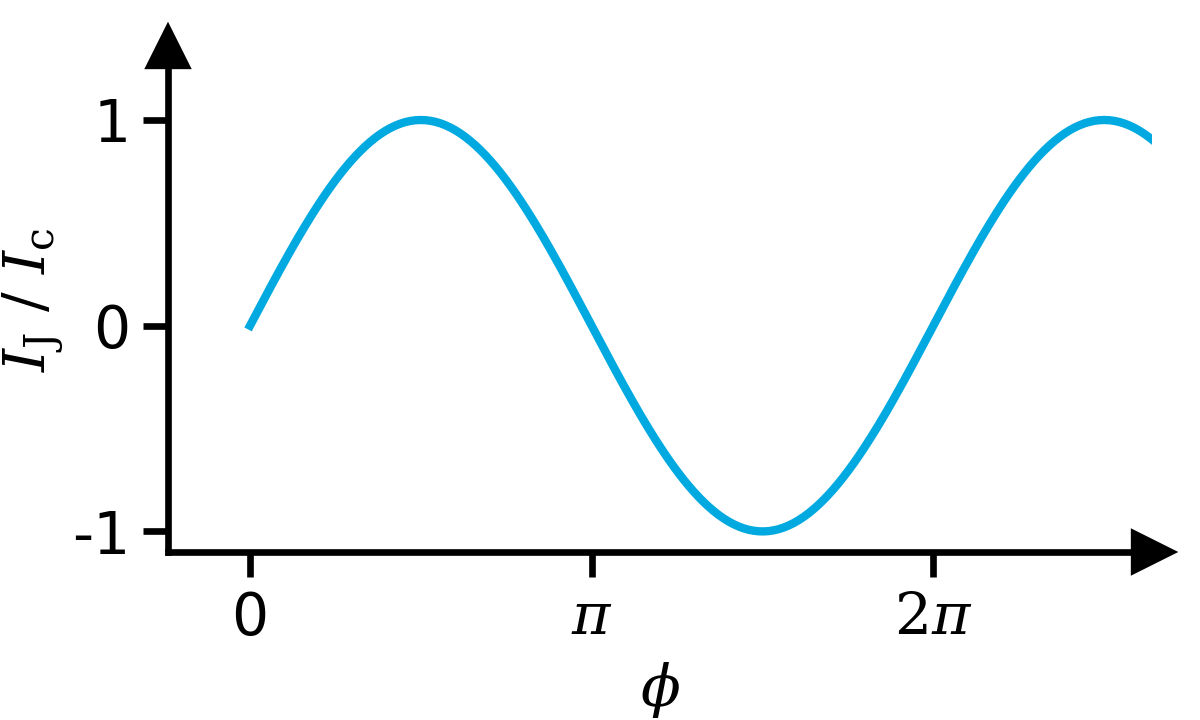

In [5]:
fig, ax = sc.get_figure(figsize=(2.0, 1.2))
ax.plot(
    phi,
    I_J_phi,
    color=sc.seeblau100,
)

ax.set_ylim((-1.1, 1.35))
ax.set_yticks([0, 1, -1])

ax.set_xlim((-0.24 * np.pi, 2.64 * np.pi))
ax.set_xticks([0, np.pi, 2 * np.pi], labels=["0", "$\\pi$", "$2\\pi$"])

xlabel = "$\\phi$"
ylabel = "$I_\\mathrm{J}\\,\\,/\\,\\,I_\\mathrm{c}$"
title = "theory/macro/josephson-iphi"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# Josephson $I(t)$

In [6]:
from superconductivity.api import k_B_meV, G_0_muS, h_e_pVs

Delta_meV = 0.180
t_ps = np.linspace(0, 30, 1001)  # ps
V_mV = np.array([Delta_meV])
I_C = np.pi / 2
phi_0 = 0.0

nu_0_GHz = 2 / h_e_pVs * V_mV
t_0_ps = 1 / nu_0_GHz

phi = np.zeros((t_ps.shape[0], V_mV.shape[0]))
for i, v_mV in enumerate(V_mV):
    phi[:, i] = phi_0 + 2 * np.pi * nu_0_GHz[i] * t_ps * 1e-3

I_J = I_C * np.sin(phi)
t_0_ps

array([0.01148797])

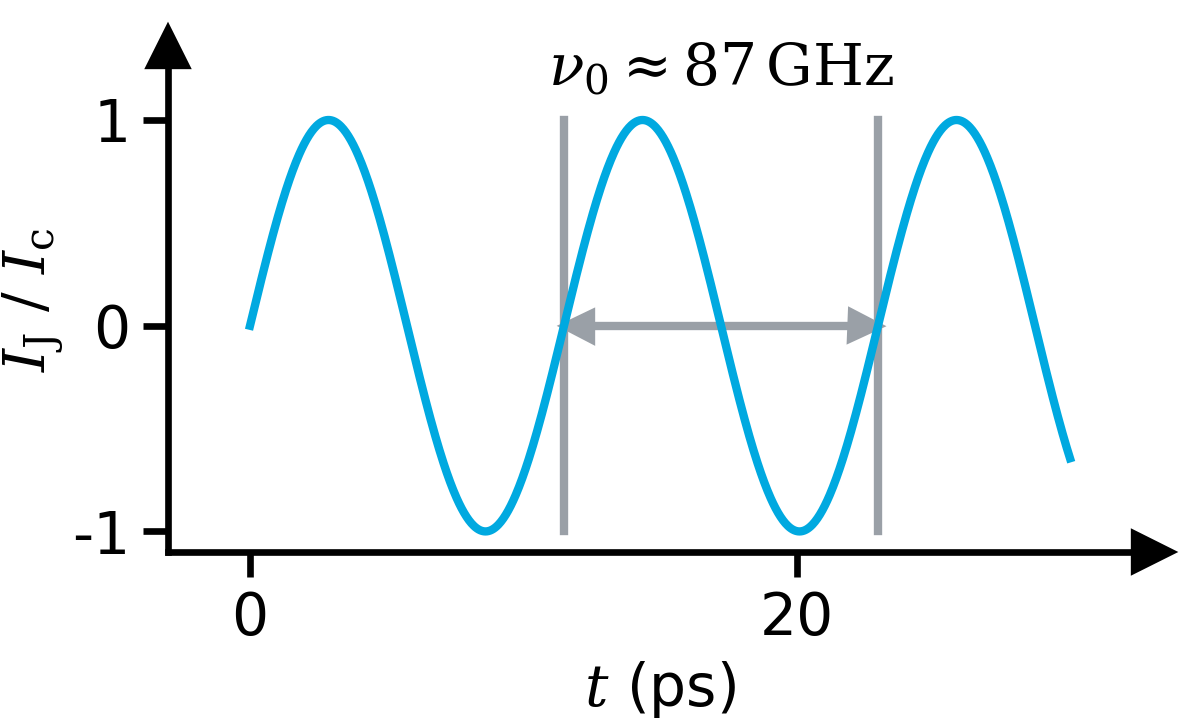

In [7]:
fig, ax = sc.get_figure(figsize=(2.0, 1.2))

for i, v_mV in enumerate(V_mV):
    ax.plot(
        t_ps,
        I_J[:, i] / I_C,
        color=sc.seeblau100,
        zorder=10,
    )
t_0 = 1e3 / nu_0_GHz[0]
ax.plot([t_0 + 0.5, 2 * t_0 - 0.5], [0, 0], "-", color=sc.seegrau65)
ax.plot([t_0, t_0], [-1, 1], "-", color=sc.seegrau65)
ax.plot([2 * t_0, 2 * t_0], [-1, 1], "-", color=sc.seegrau65)
ax.plot([2 * t_0 - 0.5], [0], ">", color=sc.seegrau65, clip_on=False, ms=3)
ax.plot([t_0 + 0.5], [0], "<", color=sc.seegrau65, clip_on=False, ms=3)
ax.text(
    t_0 * 1.5,
    1.25,
    "$\\nu_0 \\approx 87\\,\\mathrm{GHz}$",  # t_0 \\approx 11\\,\\mathrm{ps},
    color="k",
    ha="center",
    va="center",
    fontsize=7,
)

ax.set_ylim((-1.1, 1.35))
ax.set_yticks([0, 1, -1])

ax.set_xlim(-3, 33)
ax.set_xticks([0, 20])

xlabel = "$t$ (ps)"
ylabel = "$I_\\mathrm{J}\\,\\,/\\,\\,I_\\mathrm{c}$"
title = "theory/macro/josephson-it"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# Josephson $I(V)$
https://en.wikipedia.org/wiki/Josephson_effect#/media/File:I-V_characteristics_of_Josephson_Junction.JPG

In [8]:
Delta_meV = 0.18
gamma_meV = 0.0
T_K = 0.0
V_0 = np.linspace(0, 3.08, 281)
G_N = 0.001
I_C = np.pi / 2

I_bcs = sc.get_I_bcs_nA(
    V_mV=V_0 * Delta_meV,
    Delta_meV=Delta_meV,
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
) / (Delta_meV * G_0_muS * G_N)
I = np.concatenate((np.array([0.0, I_C]), I_bcs))
V = np.concatenate((np.array([0.0, 0.0]), V_0))

I = np.concatenate((-np.flip(I), I))
V = np.concatenate((-np.flip(V), V))

V_mV = V * Delta_meV

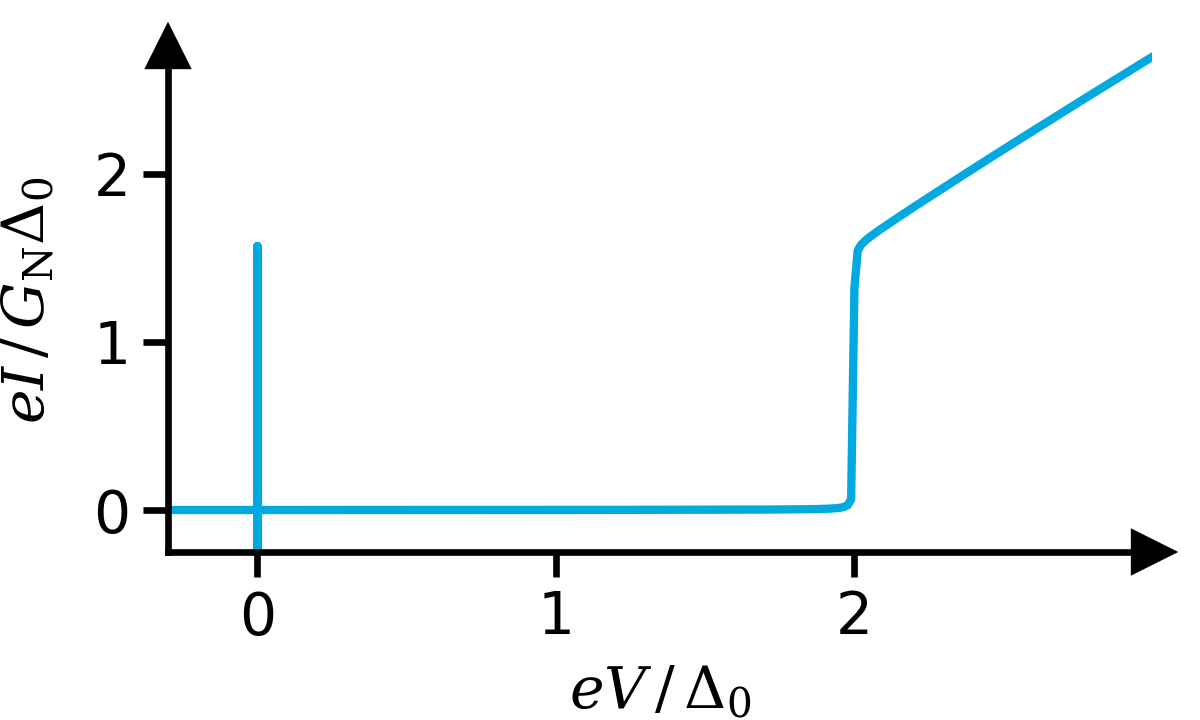

In [9]:
fig, ax = sc.get_figure(figsize=(2.0, 1.2))

ax.plot(
    V,
    I,
    color=sc.seeblau100,
)

ax.set_xlim((-0.3, 3))
ax.set_xticks([0, 1, 2], labels=["0", "1", "2"])

ax.set_ylim((-0.25, 2.75))
ax.set_yticks([0, 1, 2, I_C], labels=["0", "1", "2", "$I_\\mathrm{C}$"])
ax.set_yticks([0, 1, 2])

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$eI\\,/\\,G_\\mathrm{N}\\Delta_0$"
title = "theory/macro/josephson-iv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# $I_C(T)$ Ambegaokar-Baratoff

In [10]:
Delta_meV = 0.18
T_c_K = sc.get_T_c_K(Delta_meV=Delta_meV)
T = np.linspace(0, 1, 101)
T_K = T * T_c_K
IcT_AB = sc.get_IcT_ab(T_K=T_K, Delta_meV=Delta_meV, G_N=1.0)

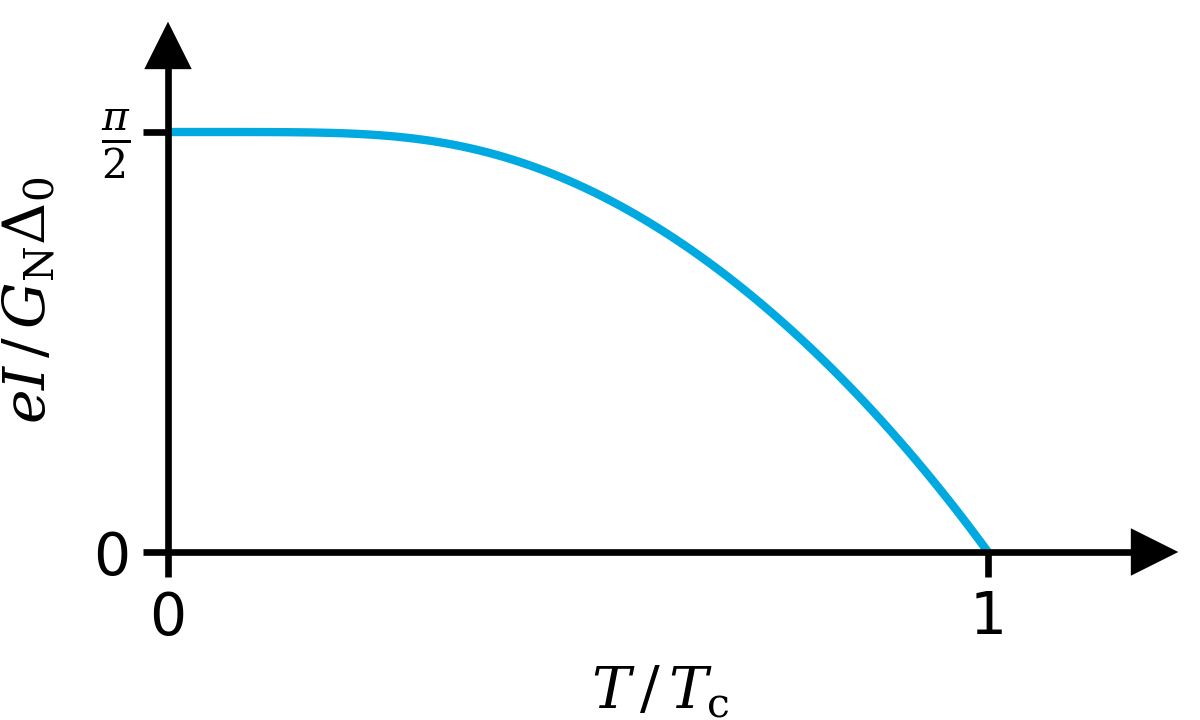

In [11]:
fig, ax = sc.get_figure(figsize=(2.0, 1.2))

# Plot the simplified gap curve
ax.plot(T, IcT_AB, color=sc.seeblau100)

ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2 * np.pi / 2)
ax.set_yticks([0, np.pi / 2], labels=["0", "$\\frac{\\pi}{2}$"])
ax.set_xticks([0, 1])

xlabel = "$T\\,/\\,T_\\mathrm{c}$"
ylabel = "$eI\\,/\\,G_\\mathrm{N}\\Delta_0$"
title = "theory/macro/critical-current"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# $U(\phi)$

In [12]:
I = np.array([0, 0.5, 0.99])
phi = np.linspace(-2.6, 0.6, 321)
phi_pi = phi * 2 * np.pi
U_phi = np.zeros((phi.shape[0], I.shape[0]))
for j, i in enumerate(I):

    U_phi[:, j] = -np.cos(phi_pi) - i * phi_pi

dudphi = np.abs(np.gradient(U_phi, phi, axis=0))


def local_minima_indices(y: np.ndarray, *, strict: bool = True) -> np.ndarray:
    y = np.asarray(y)
    if y.ndim != 1 or y.size < 3:
        return np.zeros(0, dtype=int)

    if strict:
        m = (y[1:-1] < y[:-2]) & (y[1:-1] < y[2:])
    else:
        m = (
            (y[1:-1] <= y[:-2])
            & (y[1:-1] <= y[2:])
            & ((y[1:-1] < y[:-2]) | (y[1:-1] < y[2:]))
        )
    return np.flatnonzero(m) + 1


idx0 = local_minima_indices(+dudphi[:, 0])
idx1 = local_minima_indices(+dudphi[:, 1])
idx2 = local_minima_indices(-dudphi[:, 2])

x_ball0 = phi[idx0[1]]
x_ball1a = phi[idx1[1]]
x_ball1b = phi[idx1[3]]
x_ball2 = phi[idx2[2]]

U_phi_0_move = np.copy(U_phi[:, 0])
U_phi_1a_move = np.copy(U_phi[:, 1])
U_phi_1b_move = np.copy(U_phi[:, 1])
U_phi_2_move = np.copy(U_phi[:, 2])

U_phi_0_move += 0.8
U_phi_1a_move += 0.8
U_phi_1b_move += 0.8
U_phi_2_move += 0.8

y_ball0 = U_phi_0_move[idx0[1]]
y_ball1a = U_phi_1a_move[idx1[1]]
y_ball1b = U_phi_1b_move[idx1[3]]
y_ball2 = U_phi_2_move[idx2[2]]

U_phi_0_move[U_phi_0_move >= y_ball0 + 0.3] = np.nan
U_phi_0_move[phi >= -1.5] = np.nan

U_phi_1a_move[U_phi_1a_move >= y_ball1a + 0.3] = np.nan
U_phi_1a_move[U_phi_1a_move < y_ball1a] = np.nan
U_phi_1a_move[phi >= -1.5] = np.nan

U_phi_1b_move[U_phi_1b_move >= y_ball1b + 0.3] = np.nan
U_phi_1b_move[U_phi_1b_move < y_ball1b] = np.nan
U_phi_1b_move[phi >= -0.6] = np.nan

U_phi_2_move[U_phi_2_move <= 0.05] = np.nan
# U_phi_1_move[phi <= -1.2] = np.nan

U_phi_jump = np.copy(U_phi[:, 1])
U_phi_jump += 1.6
U_phi_jump[phi < -1.6] = np.nan
U_phi_jump[phi > -1.2] = np.nan

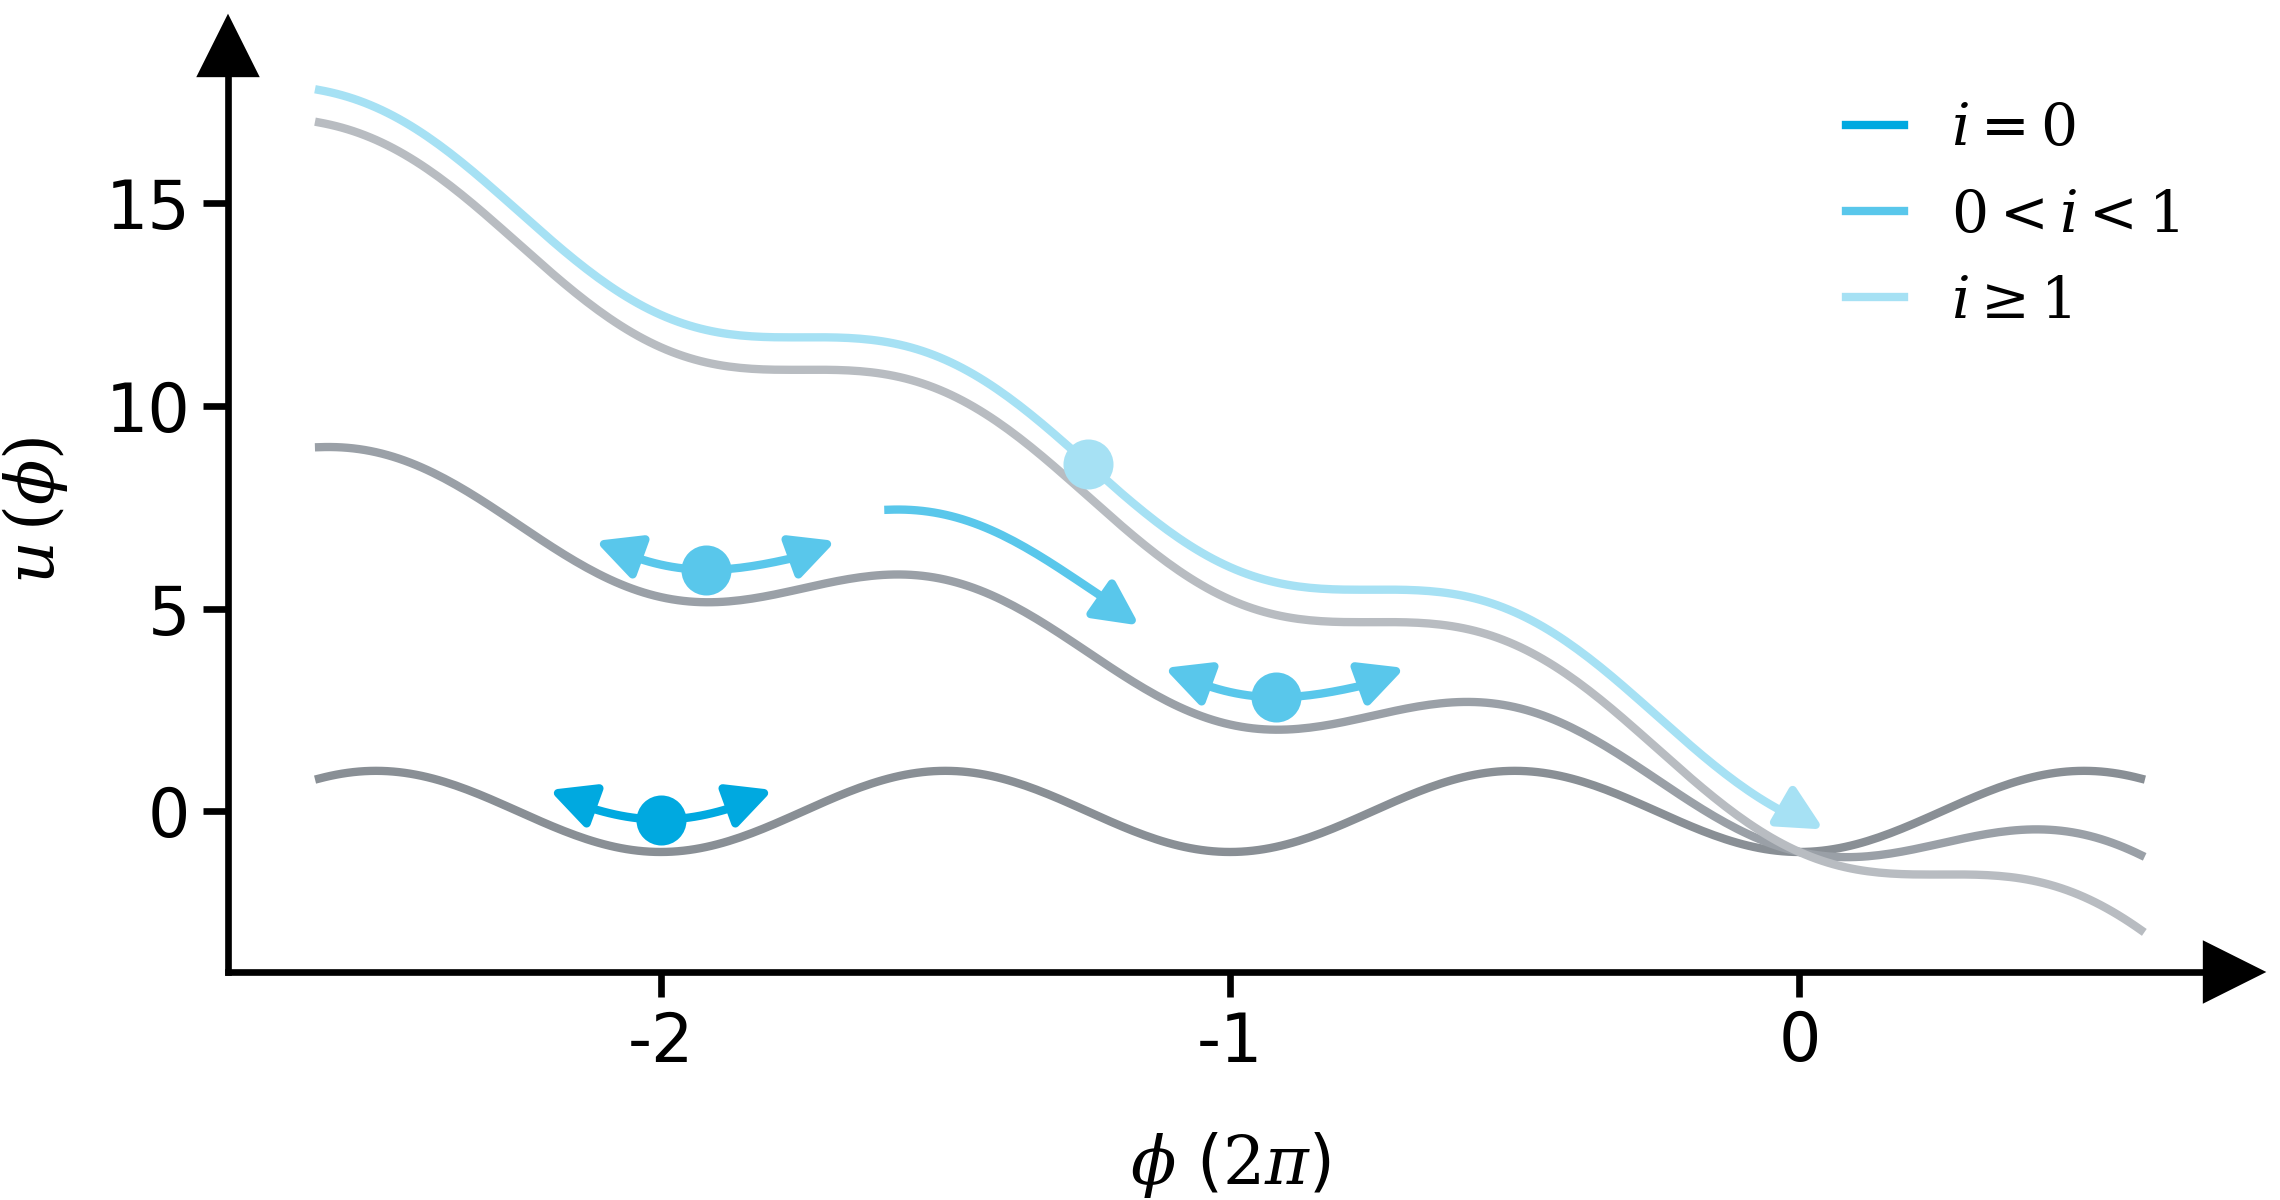

In [13]:
fig, ax = sc.get_figure(
    figsize=(3.8, 2.0),
    subfigure=False,
    padding=(0.3, 0.3),
)

jump_color = sc.seeblau65

# trajectories
ax.plot(phi, U_phi_0_move, color=sc.seeblau100)
ax.plot(phi, U_phi_1a_move, color=sc.seeblau65)
ax.plot(phi, U_phi_2_move, color=sc.seeblau35)

# phase slips
ax.plot(phi, U_phi_1b_move, color=sc.seeblau65)
ax.plot(phi, U_phi_jump, color=jump_color)

s = 20

# marker phase slip
ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(-35)
ax.scatter([-1.2], [5], marker=ms, s=s, color=jump_color, clip_on=False)

# marker stable phase
ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(20)
ax.scatter(
    [x_ball0 + 0.15],
    [y_ball0 + 0.5],
    marker=ms,
    s=s,
    color=sc.seeblau100,
    clip_on=False,
)

ms = MarkerStyle("<")
ms._transform = ms.get_transform().rotate_deg(-20)
ax.scatter(
    [x_ball0 - 0.15],
    [y_ball0 + 0.5],
    marker=ms,
    s=s,
    color=sc.seeblau100,
    clip_on=False,
)

# marker meat-stable phase
ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(20)
ax.scatter(
    [x_ball1a + 0.18],
    [y_ball1a + 0.5],
    marker=ms,
    s=s,
    color=sc.seeblau65,
    clip_on=False,
)

ms = MarkerStyle("<")
ms._transform = ms.get_transform().rotate_deg(-20)
ax.scatter(
    [x_ball1a - 0.15],
    [y_ball1a + 0.5],
    marker=ms,
    s=s,
    color=sc.seeblau65,
    clip_on=False,
)

ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(20)
ax.scatter(
    [x_ball1b + 0.18],
    [y_ball1b + 0.5],
    marker=ms,
    s=s,
    color=sc.seeblau65,
    clip_on=False,
)

ms = MarkerStyle("<")
ms._transform = ms.get_transform().rotate_deg(-20)
ax.scatter(
    [x_ball1b - 0.15],
    [y_ball1b + 0.5],
    marker=ms,
    s=s,
    color=sc.seeblau65,
    clip_on=False,
)

# marker running phase
ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(-30)
ax.scatter([0], [-0.1], marker=ms, s=s, color=sc.seeblau35, clip_on=False)

# phase particles
ms = 5
ax.plot(x_ball0, y_ball0, "o", color=sc.seeblau100, clip_on=False, ms=ms)
ax.plot(x_ball1a, y_ball1a, "o", color=sc.seeblau65, clip_on=False, ms=ms)
ax.plot(x_ball1b, y_ball1b, "o", color=sc.seeblau65, clip_on=False, ms=ms)
ax.plot(x_ball2, y_ball2, "o", color=sc.seeblau35, clip_on=False, ms=ms)

seegraus = [sc.seegrau80, sc.seegrau65, sc.seegrau35]
for j, i in enumerate(I):
    ax.plot(phi, U_phi[:, j], color=seegraus[j], zorder=0)

ax.set_xticks([-2, -1, 0])
# ax.set_yticks([])
ax.legend(
    ["$i=0$", "$0 < i < 1$", "$i\\geq 1$"],
    # ["$i=0$", "$i \\in [0, 1]$", "$i\\geq 1$"],
    # title="$i=$",
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

title = "theory/macro/u-phi"
xlabel = "$\\phi$ ($2\\pi$)"
ylabel = "$u\\, (\\phi)$"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# RSCJ - $I(V)$

In [14]:
Delta_meV = 0.18
gamma_meV = 0.001
T_K = 0.0
G_N = 1.0
I_C = np.pi / 2
I_sw = 1
I_r = 0.5
V = np.linspace(0, 2.5, 601)
V_mV = V * Delta_meV  # mV

I_BCS = sc.get_I_bcs_nA(
    V_mV=V_mV,
    G_N=G_N,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    gamma_meV=gamma_meV,
) / (Delta_meV * G_0_muS)

I_JJ = V_mV / Delta_meV * 15
I_PD = V_mV / Delta_meV * 0.03

I_SW = np.copy(I_JJ)
I_SW[I_SW > I_sw] = I_sw
I_SW[I_BCS > I_SW] = I_BCS[I_BCS > I_SW]

I_R = np.copy(I_JJ)
I_R[I_R > I_r] = I_r
I_R[I_BCS > I_R] = I_BCS[I_BCS > I_R]

I_SW_sc = np.copy(I_SW)
I_SW_sc[I_SW_sc >= I_sw] = np.nan
I_SW_jp = np.copy(I_SW)
I_SW_jp[I_SW_jp != I_sw] = np.nan
I_SW_dp = np.copy(I_SW)
I_SW_dp[I_SW_dp <= I_sw] = np.nan

I_R_sc = np.copy(I_R)
I_R_sc[I_R_sc >= I_r] = np.nan
I_R_jp = np.copy(I_R)
I_R_jp[I_R_jp != I_r] = np.nan
I_R_dp = np.copy(I_R)
I_R_dp[I_R_dp <= I_r] = np.nan

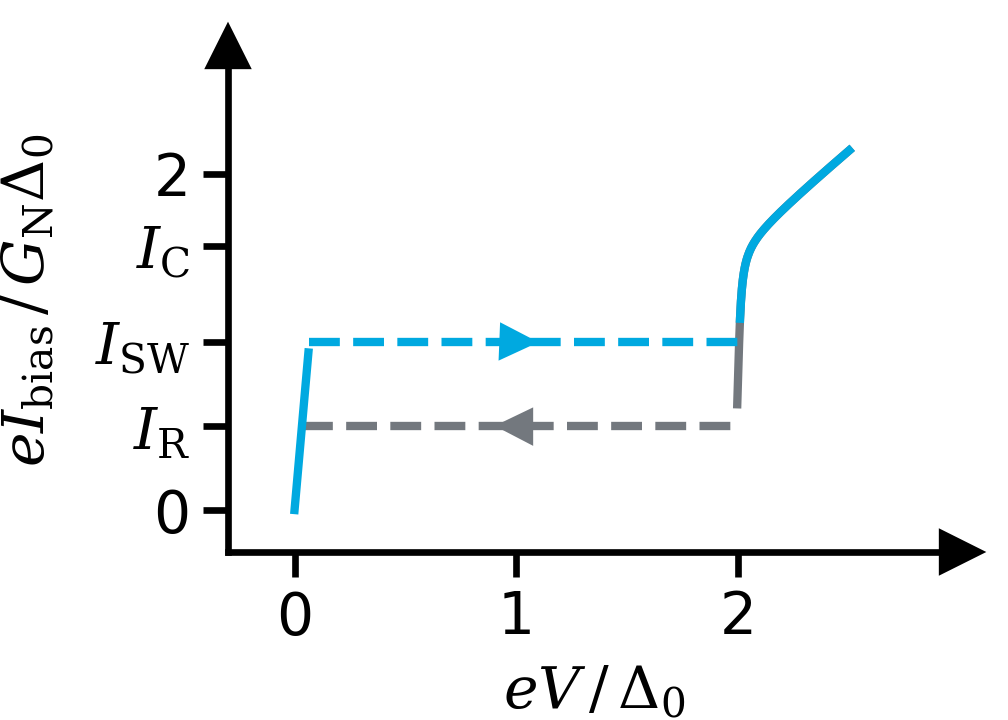

In [15]:
fig, ax = sc.get_figure(figsize=(1.68, 1.2), padding=(0.3, 0.2))

ax.plot(V, I_R_jp, "--", color=sc.seegrau100)
ax.plot(V, I_R_dp, color=sc.seegrau100)
ax.plot(1, I_r, "<", color=sc.seegrau100, clip_on=False, ms=3)

ax.plot(V, I_SW_sc, color=sc.seeblau100)
ax.plot(V, I_SW_jp, "--", color=sc.seeblau100)
ax.plot(V, I_SW_dp, color=sc.seeblau100)
ax.plot(1, I_sw, ">", color=sc.seeblau100, clip_on=False, ms=3)

# ax.plot(V, I_R_sc, color=seegrau100)

ax.set_xlim((-0.3, 3))
ax.set_xticks([0, 1, 2], labels=["0", "1", "2"])

ax.set_ylim(-0.25, 2.75)
ax.set_yticks(
    [0, 2, I_C, I_sw, I_r],
    labels=["0", "2", "$I_\\mathrm{C}$", "$I_\\mathrm{SW}$", "$I_\\mathrm{R}$"],
)


xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$eI_\\mathrm{bias}\\,/\\,G_\\mathrm{N}\\Delta_0$"
title = "theory/macro/rcsj-iv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# Shapiro iv (over, under, ideal)
https://www.researchgate.net/figure/Schematic-current-voltage-characteristics-of-underdamped-left-and-overdamped-right_fig1_235889223

In [16]:
# generate data

from scipy.special import jv

Delta_meV = 0.180
V_mV = np.linspace(-3, 3, 601) * Delta_meV  # mV
A_mV = np.array([0, 0.3, 0.6]) * Delta_meV  # mV
n = np.arange(-10, 11, 1)
I_bias = np.linspace(-3, 3, 601)

G_N = 1
T_K = 0.0
gamma_meV = 0.0
nu_GHz = 10.0
m = 2

nu_mV = nu_GHz * h_e_pVs
alpha = m * A_mV / nu_mV
V_n_mV = n / m * nu_mV
V_n = V_n_mV / Delta_meV

I_C = np.pi / 2
I_SW_over = 0.2
I_SW_under = 0.5

I_BCS = sc.get_I_bcs_nA(
    V_mV=V_mV,
    G_N=G_N,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    gamma_meV=gamma_meV,
)

# PAT (Voltage Bias)
I_PAT = sc.get_I_pat_nA(A_mV=A_mV, V_mV=V_mV, I_nA=I_BCS, nu_GHz=nu_GHz).T / (
    Delta_meV * G_0_muS
)

# PAT (Current Bias)
V_PAT = np.empty((I_bias.shape[0], A_mV.shape[0]), dtype=np.float64)
for i, a_mV in enumerate(A_mV):
    V_over, I_over = sc.oversample(V_mV / Delta_meV, I_PAT[:, i], upsample=100)
    V_PAT[:, i] = sc.bin_y_over_x(I_over, V_over, I_bias)

# Shapiro Heights
w = np.empty((A_mV.shape[0], n.shape[0]))
for i_a, a_mV in enumerate(A_mV):
    for i_n, n_i in enumerate(n):
        w_i = np.abs(jv(int(n_i), float(alpha[i_a])))
        w[i_a, i_n] = w_i

# zorder
idx = np.empty_like(w)
for i_n, n_i in enumerate(n):
    idx_i = np.argsort(w[:, i_n])
    idx[:, i_n] = idx_i

# overdamped Shapiro
V_over = np.copy(V_PAT)
for i_a, a_mV in enumerate(A_mV):
    for i_n, n_i in enumerate(n):
        w_i = w[i_a, i_n]
        w_lower = np.sum(w[i_a, 10:i_n])
        w_upper = np.sum(w[i_a, 10 : (i_n + 1)])
        if w_upper < I_C:
            if w_lower > -I_C:
                v = V_over[:, i_a]
                v = np.where(
                    np.logical_and(
                        I_bias <= w_upper * I_SW_over,
                        I_bias >= w_lower * I_SW_over,
                    ),
                    V_n[i_n],
                    v,
                )
                v = np.where(
                    np.logical_and(
                        I_bias >= -w_upper * I_SW_over,
                        I_bias <= -w_lower * I_SW_over,
                    ),
                    -V_n[i_n],
                    v,
                )
                V_over[:, i_a] = v

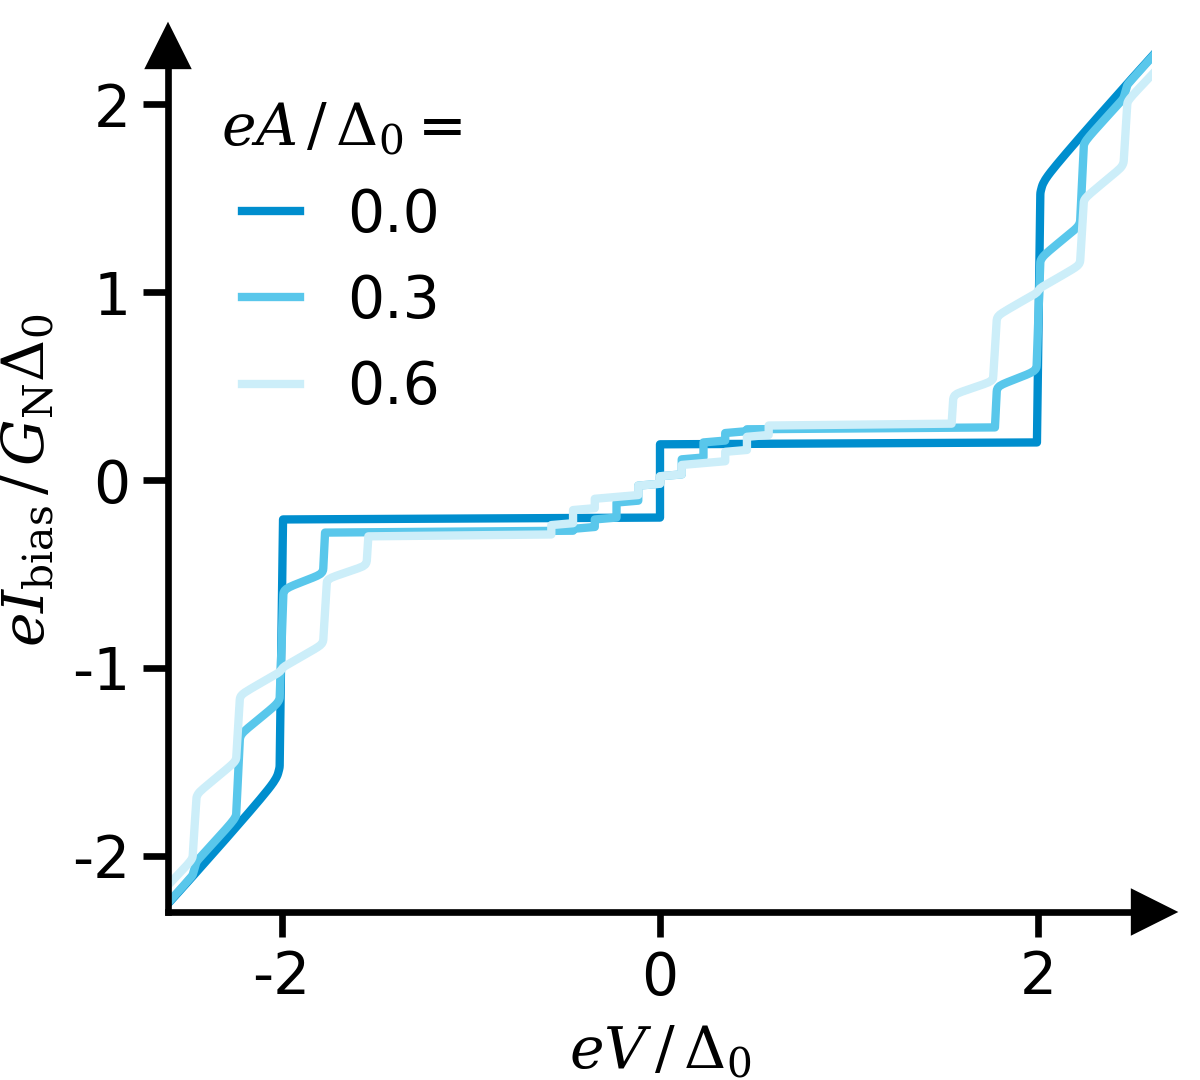

In [17]:
fig, ax = sc.get_figure(figsize=(2.0, 1.8))

for i, a_mV in enumerate(A_mV):
    ax.plot(
        V_over[:, i],
        I_bias,
        "-",
        color=sc.seeblau[2 * i % 5],
    )


handles, labels = [], []
for i, a_mV in enumerate(A_mV):
    line_handle = Line2D([0], [0], color=sc.seeblau[2 * i % 5], linestyle="-")
    label = f"{A_mV[i]/Delta_meV:1.1f}"
    handles.append(line_handle)
    labels.append(label)
ax.legend(
    handles=handles,
    labels=labels,
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-2.3, 2.3)

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$eI_\\mathrm{bias}\\,/\\,G_\\mathrm{N}\\Delta_0$"
title = "theory/macro/shapiro-over"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

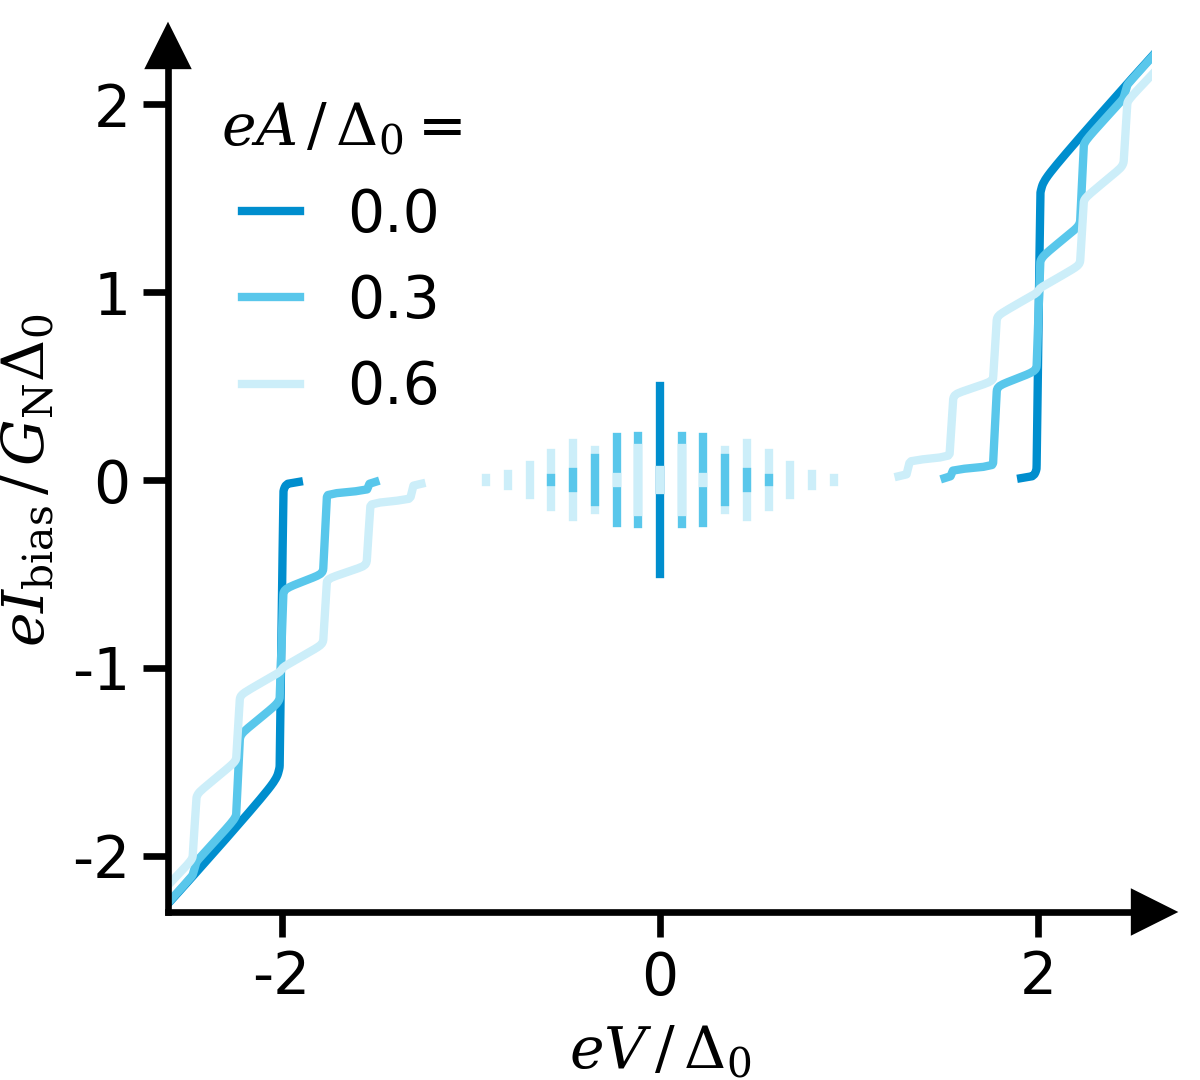

In [18]:
fig, ax = sc.get_figure(figsize=(2.0, 1.8))

for i_a, a_mV in enumerate(A_mV):
    x = np.copy(V_PAT[:, i_a])
    y = np.copy(I_bias)
    y[np.abs(x) <= 1.2] = np.nan
    ax.plot(x, y, "-", color=sc.seeblau[2 * i_a], zorder=i_a, ms=1)
    for i_n, n_i in enumerate(n):
        V_ss = V_n[i_n]
        I_ss = w[i_a, i_n] * I_SW_under
        if I_ss >= 0.01:
            ax.plot(
                [V_ss, V_ss],
                [-I_ss, I_ss],
                "-",
                color=sc.seeblau[2 * i_a],
                zorder=3 - idx[i_a, i_n],
            )


handles, labels = [], []
for i, a_mV in enumerate(A_mV):
    line_handle = Line2D([0], [0], color=sc.seeblau[2 * i], linestyle="-")
    label = f"{A_mV[i]/Delta_meV:1.1f}"
    handles.append(line_handle)
    labels.append(label)
ax.legend(
    handles=handles,
    labels=labels,
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-2.3, 2.3)

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$eI_\\mathrm{bias}\\,/\\,G_\\mathrm{N}\\Delta_0$"
title = "theory/macro/shapiro-under"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

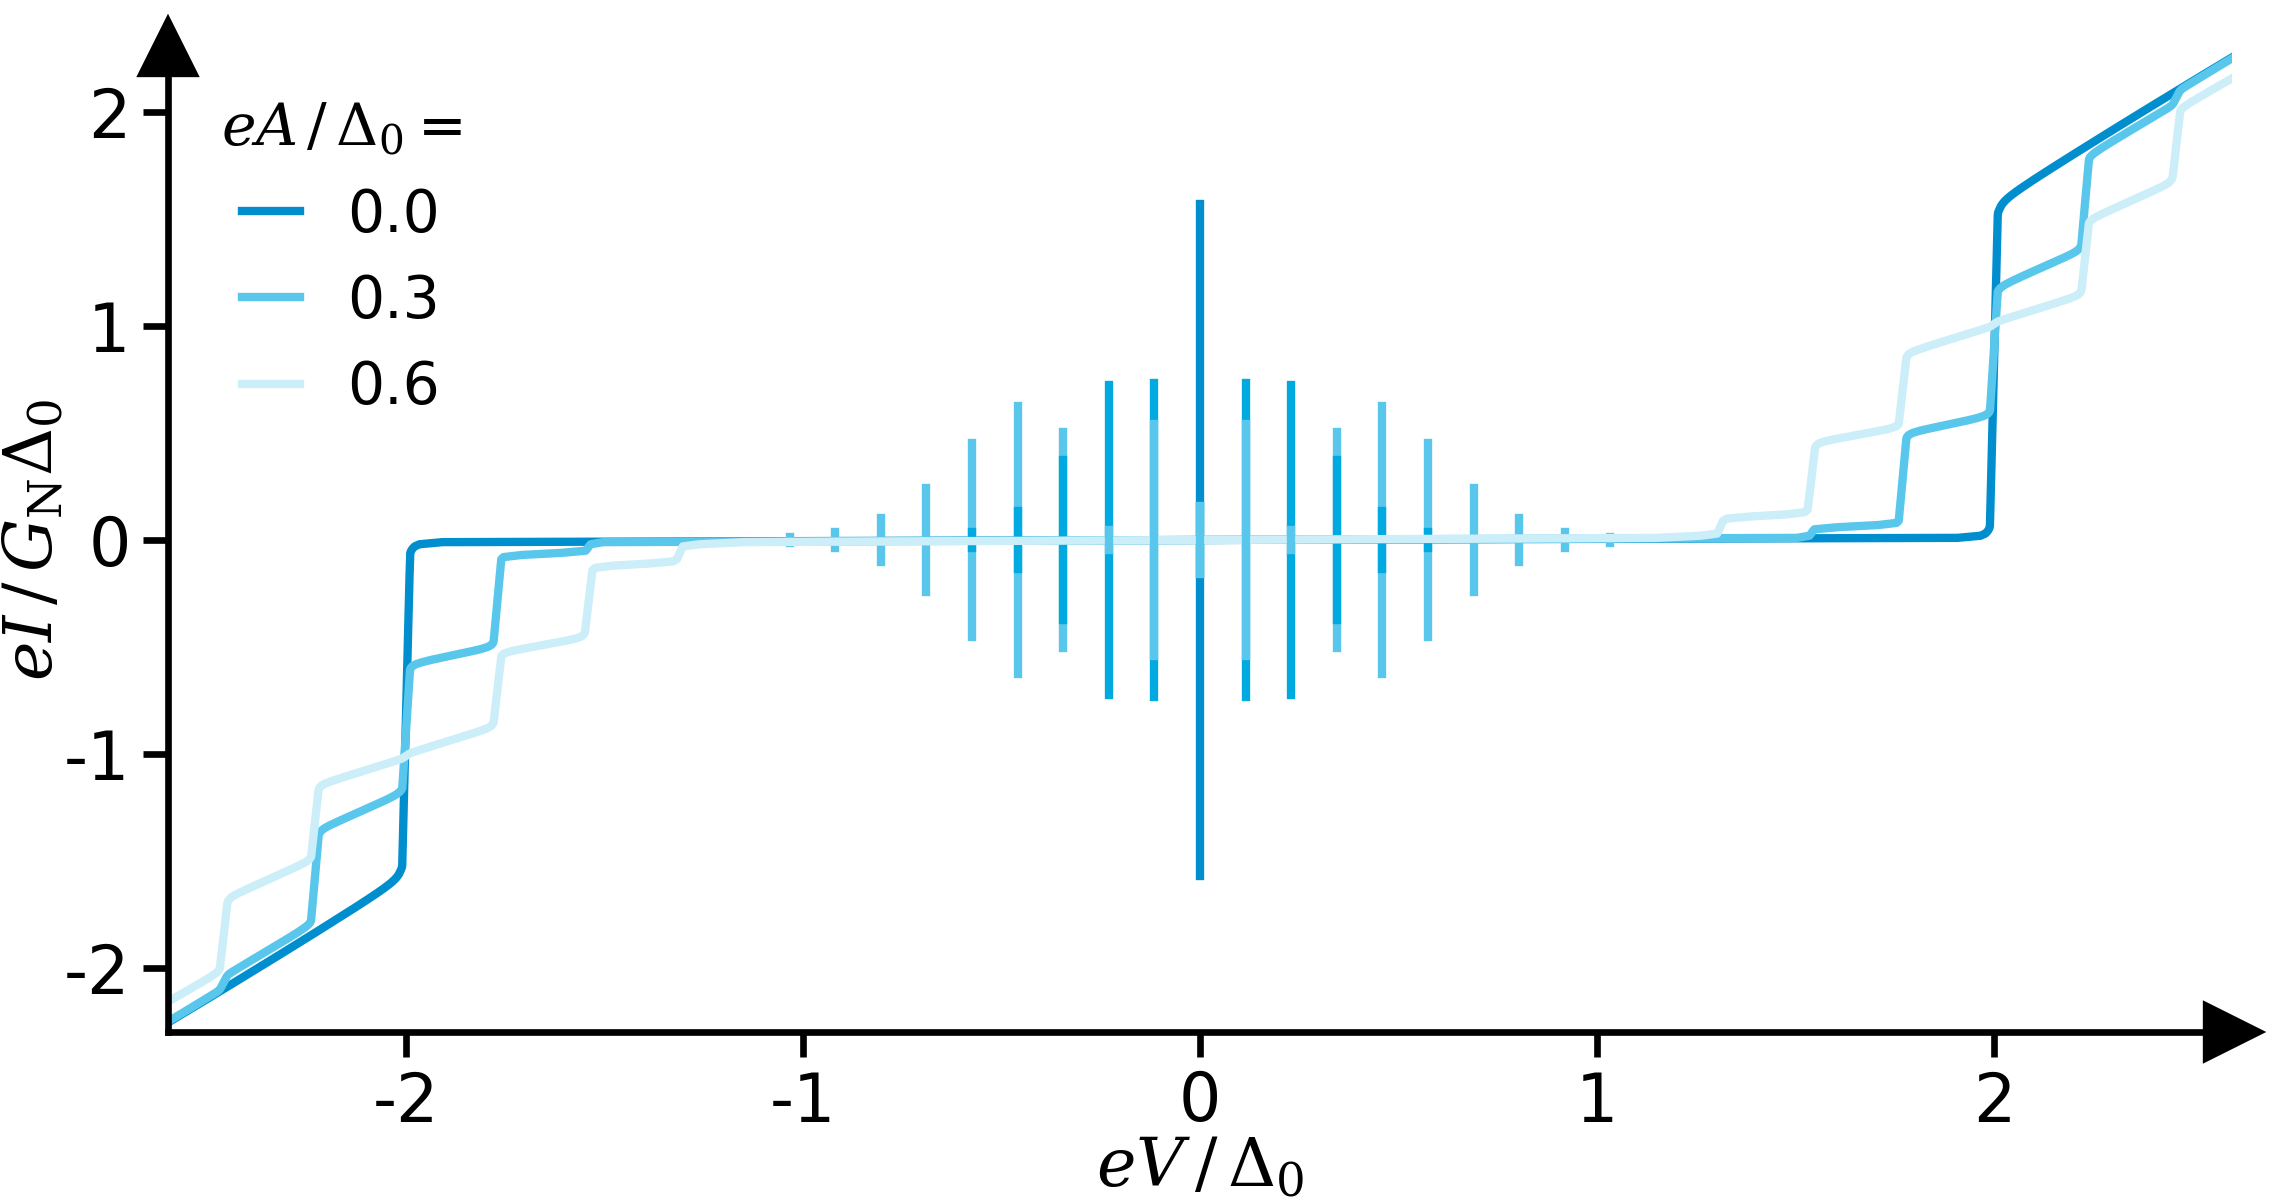

In [19]:
fig, ax = sc.get_figure(figsize=(3.8, 2.0), subfigure=False)

colors = [sc.seeblau100, sc.seeblau65, sc.seeblau35]

for i_a, a_mV in enumerate(A_mV):
    ax.plot(
        V_PAT[:, i_a],
        I_bias,
        "-",
        color=sc.seeblau[2 * i_a],
        ms=1,
        zorder=i_a,
    )
    for i_n, n_i in enumerate(n):
        V_ss = V_n[i_n]
        I_ss = w[i_a, i_n] * I_C
        if I_ss >= 0.01:
            ax.plot(
                [V_ss, V_ss],
                [-I_ss, I_ss],
                "-",
                color=sc.seeblau[i_a],
                zorder=3 - idx[i_a, i_n],
            )


handles, labels = [], []
for i, a_mV in enumerate(A_mV):
    line_handle = Line2D([0], [0], color=sc.seeblau[2 * i], linestyle="-")
    label = f"{A_mV[i]/Delta_meV:1.1f}"
    handles.append(line_handle)
    labels.append(label)
ax.legend(
    handles=handles,
    labels=labels,
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-2.3, 2.3)

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$eI\\,/\\,G_\\mathrm{N}\\Delta_0$"
title = "theory/macro/shapiro-ideal"

sc.theory_layout(fig, ax, title, xlabel, ylabel, padding=(0.3, 0.3))

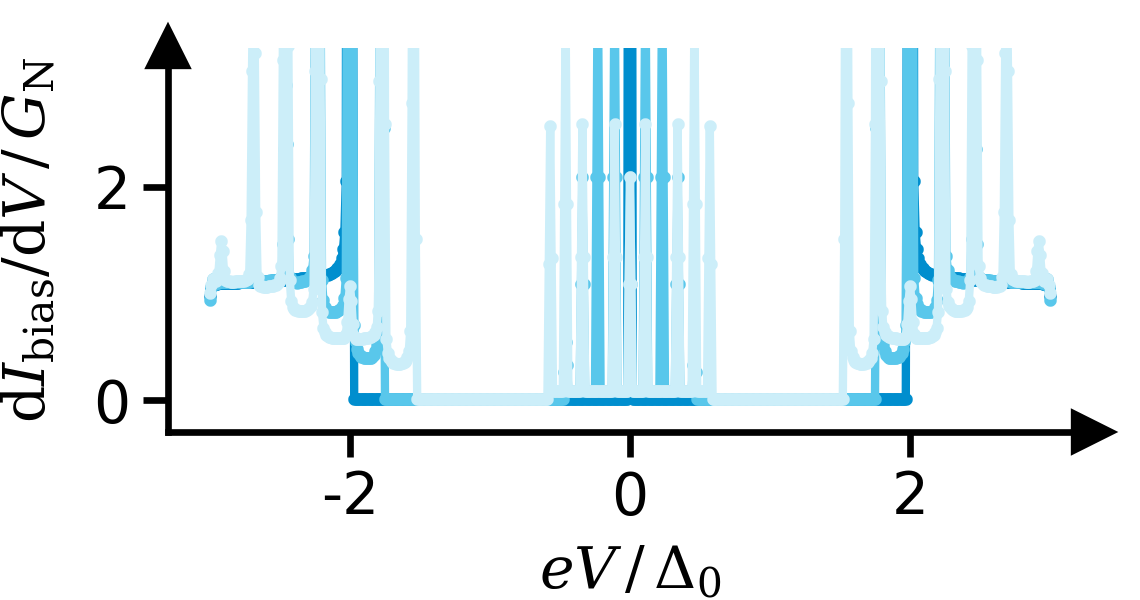

In [20]:
fig, ax = sc.get_figure(figsize=(1.9, 1.0))

for i, a_mV in enumerate(A_mV):
    v_over, i_over = sc.oversample(V_over[:, i] * Delta_meV, I_bias, upsample=1000)
    I_over = sc.bin_y_over_x(v_over, i_over, V_mV)
    didv_over = np.gradient(I_over, V_mV) * Delta_meV
    ax.plot(
        V_mV / Delta_meV,
        didv_over,
        ".-",
        color=sc.seeblau[2 * i],
        ms=1,
    )

# ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-0.3, 3.3)

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$\\mathrm{d}I_\\mathrm{bias}/\\mathrm{d}V\\,/\\,G_\\mathrm{N}$"
title = None

sc.theory_layout(fig, ax, title, xlabel, ylabel)